# Logistic population growth model

This example shows how the [Logistic model](http://pints.readthedocs.io/en/latest/toy/logistic_model.html) can be used.

This model describes the [growth of a population](https://en.wikipedia.org/wiki/Population_growth#Logistic_equation), from an initial starting point up to a maxium carrying capacity $k$. The rate of growth is given by a second parameter, $r$.

$$ f(t) = \frac{k}{1 + (k / p_0 - 1) e^{-r t}} $$


In [1]:
import pints
import pints.toy
import matplotlib.pyplot as plt
import numpy as np

p0 = 2
model = pints.toy.LogisticModel(p0)

Parameters are given in the order ``(r, k)``.

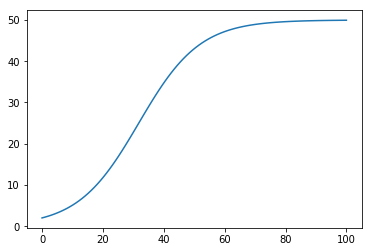

In [2]:
times = np.linspace(0, 100, 100)
r = 0.1
k = 50
values = model.simulate((r, k), times)

plt.figure()
plt.plot(times, values)
plt.show()

We can see that, starting from ``p0 = 2`` the model quickly approaches the carrying capacity ``k = 50``.

We can test that, if we wait long enough, we get very close to $k$:

In [3]:
print(model.simulate((r, k), [40]))
print(model.simulate((r, k), [80]))
print(model.simulate((r, k), [120]))
print(model.simulate((r, k), [160]))
print(model.simulate((r, k), [200]))
print(model.simulate((r, k), [240]))
print(model.simulate((r, k), [280]))

[ 34.73246508]
[ 49.60065997]
[ 49.99262803]
[ 49.99986496]
[ 49.99999753]
[ 49.99999995]
[ 50.]


This model also provides sensitivities: derivatives $\frac{\partial y}{\partial p}$ of the output $y$ with respect to the parameters $p$.

In [4]:
values, sensitivities = model.simulate_with_sensitivities((r, k), times)

We can plot these sensitivities, to see where the model is sensitive to each of the parameters:

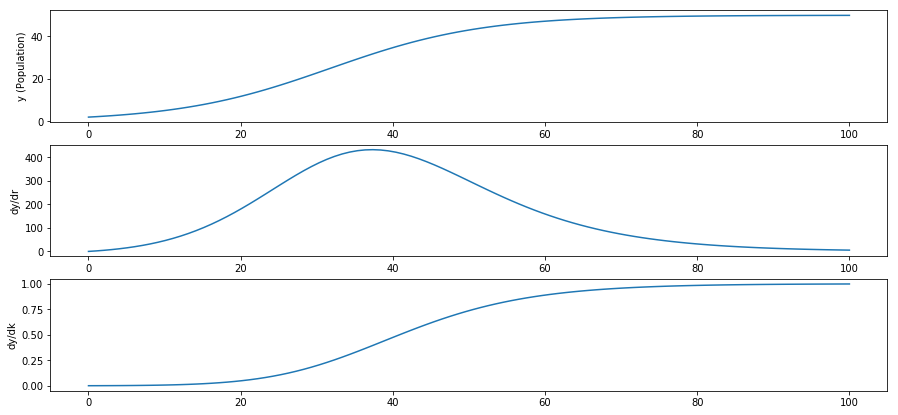

In [5]:
plt.figure(figsize=(15,7))

plt.subplot(3, 1, 1)
plt.ylabel('y (Population)')
plt.plot(times, values)

plt.subplot(3, 1, 2)
plt.ylabel('dy/dr')
plt.plot(times, sensitivities[:, 0])

plt.subplot(3, 1, 3)
plt.ylabel('dy/dk')
plt.plot(times, sensitivities[:, 1])

plt.show()

For $\frac{\partial y}{\partial r}$ (middle plot), we see that the model reacts most strongly to changes in $r$ in around $t=35$, just when the population size is changing fastest. This makes a lot of sense: since $r$ determines the rate of growth it is most clearly visible during the period of greatest growth.

For $\frac{\partial y}{\partial k}$ (bottom plot) the result is very similar to the graph of $y$ itself: The carrying capacity is hard to tell at the very beginning, as the population hasn't begun to grow much yet. As growth increases it becomes easier to predict what the final population size will be. Finally, when the carrying capacity has been reached the value of $y \approx k$, so that the derivative is almost 1.

For parameter estimation, this tells us something interesting: Namely that we need to know about the final stages of the process to get an accurate estimate of $k$, while estimating $r$ requires the period of greatest growth to be present in the signal.